## Imports

In [69]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression

## Data Load

In [29]:
data_cleaned = pd.read_csv(r'C:\Users\spider\Documents\Springboard\GitHub\NYC-Airbnb\Data Wrangling\airbnb_data_cleaned.csv')

## Extract Information

In [30]:
data_cleaned.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2762,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2976,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,3021,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2793,0.10,1,0


In [31]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  last_review                     48895 non-null  int64  
 11  reviews_per_month               48895 non-null  float64
 12  calculated_host_listings_count  

In [32]:
data_cleaned.shape

(48895, 14)

In [33]:
df_obj = data_cleaned.select_dtypes(include=['object']).copy()
df_obj.shape

(48895, 3)

In [34]:
df_obj.head()

,neighbourhood_group,neighbourhood,room_type
0,Brooklyn,Kensington,Private room
1,Manhattan,Midtown,Entire home/apt
2,Manhattan,Harlem,Private room
3,Brooklyn,Clinton Hill,Entire home/apt
4,Manhattan,East Harlem,Entire home/apt


In [35]:
df_obj['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Rossville                1
Woodrow                  1
New Dorp                 1
Willowbrook              1
Fort Wadsworth           1
Name: neighbourhood, Length: 221, dtype: int64

In [36]:
dummies = pd.get_dummies(df_obj)
dummies.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
dummies['neighbourhood_Williamsburg'].value_counts()

0    44975
1     3920
Name: neighbourhood_Williamsburg, dtype: int64

In [38]:
df = pd.concat([data_cleaned,dummies], axis =1)
df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,...,0,0,0,0,0,0,0,0,1,0
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,...,0,0,0,0,0,0,0,1,0,0
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,...,0,0,0,0,0,0,0,0,1,0
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,...,0,0,0,0,0,0,0,1,0,0
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,...,0,0,0,0,0,0,0,1,0,0


In [39]:
df.drop(columns = ['neighbourhood_group', 'neighbourhood', 'room_type', 'id', 'host_id'], inplace = True)

In [40]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,2762,0.21,6,365,0,...,0,0,0,0,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,2976,0.38,2,355,0,...,0,0,0,0,0,0,0,1,0,0
2,40.80902,-73.94190,150,3,0,0,0.00,1,365,0,...,0,0,0,0,0,0,0,0,1,0
3,40.68514,-73.95976,89,1,270,3021,4.64,1,194,0,...,0,0,0,0,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,2793,0.10,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Train/Test Split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='price'), 
                                                    df.price, test_size=0.25, 
                                                    random_state=47)

In [42]:
X_train.shape, X_test.shape

((36671, 237), (12224, 237))

In [43]:
y_train.shape, y_test.shape

((36671,), (12224,))

In [44]:
X_train.dtypes

latitude                     float64
longitude                    float64
minimum_nights                 int64
number_of_reviews              int64
last_review                    int64
                              ...   
neighbourhood_Woodrow          uint8
neighbourhood_Woodside         uint8
room_type_Entire home/apt      uint8
room_type_Private room         uint8
room_type_Shared room          uint8
Length: 237, dtype: object

In [45]:
X_test.dtypes

latitude                     float64
longitude                    float64
minimum_nights                 int64
number_of_reviews              int64
last_review                    int64
                              ...   
neighbourhood_Woodrow          uint8
neighbourhood_Woodside         uint8
room_type_Entire home/apt      uint8
room_type_Private room         uint8
room_type_Shared room          uint8
Length: 237, dtype: object

### Metrics

In [46]:
train_mean = y_train.mean()
train_mean

152.05652968285565

In [47]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[152.05652968]])

In [48]:
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([152.05652968, 152.05652968, 152.05652968, 152.05652968,
       152.05652968])

In [49]:
y_te_pred = dumb_reg.predict(X_test)
y_tr_pred[:5]

array([152.05652968, 152.05652968, 152.05652968, 152.05652968,
       152.05652968])

### R-Squared

In [50]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.0, -8.801662748658678e-05)

### Mean Absolute Error

In [51]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(91.5998872695891, 93.96468770269202)

### Mean Squared Error

In [52]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(50167.654326687785, 80189.57022653896)

## Linear Regression

In [71]:
pipe = make_pipeline(StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression())

In [72]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [73]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [74]:
lr_grid_cv.fit(X_train, y_train)

C:\Users\spider\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\spider\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\spider\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('selectkbest',
                                        SelectKBest(k=10,
                                                    score_func=<function f_regression at 0x0000027A258014C8>)),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
         

In [75]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [76]:
lr_grid_cv.best_params_

{'selectkbest__k': 105}

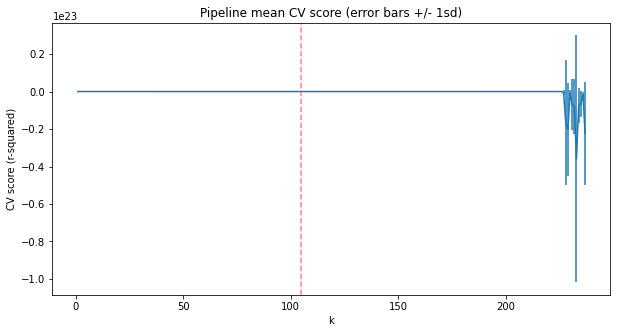

In [80]:
import matplotlib.pyplot as plt
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');
plt.show() 

## Random Forest

In [90]:
RF_pipe = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

In [92]:
grid_params = {'standardscaler': [StandardScaler(), None]
}
grid_params

{'standardscaler': [StandardScaler(copy=True, with_mean=True, with_std=True),
  None]}

In [93]:
rf_grid_cv = GridSearchCV(RF_pipe, param_grid = grid_params, cv=5, n_jobs=-1)

In [94]:
rf_grid_cv.fit(X_train, y_train)

C:\Users\spider\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split=

In [95]:
rf_grid_cv.best_params_

{'standardscaler': None}

In [96]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([-0.04288185,  0.05150798,  0.06606701,  0.04786724,  0.01299561])

In [97]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.02711119763432248, 0.039094369931513544)

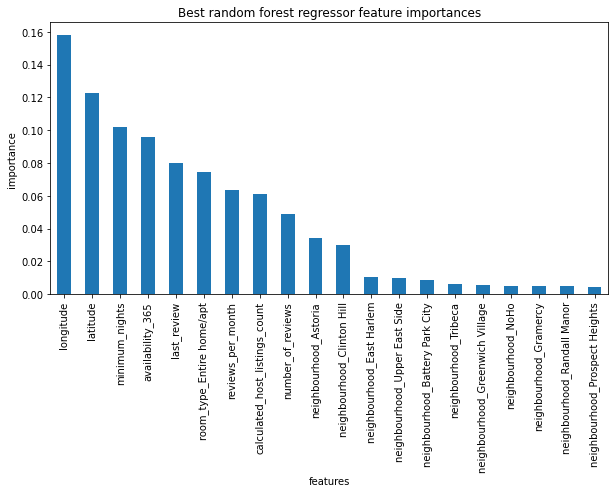

In [100]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps_partial = rf_feat_imps[:20]
rf_feat_imps_partial.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

## Linear regression model performance

In [101]:
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [102]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

(70.60654112290806, 1.5079152440058592)

In [103]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

73.77536662180765

## Random forest regression model performance

In [104]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [105]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(69.21750835813587, 1.879545032615053)

In [106]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

71.58680464659686